# World

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style='white')
population = pd.read_csv('../BDD/population.csv', sep=';')
energy = pd.read_csv('../BDD/energy.csv')
gdp = pd.read_csv('../BDD/world-gdp-over-the-last-two-millennia.csv', sep=';')

gpec = pd.read_csv('../BDD/global-energy-substitution.csv')
total = gpec['Wind (TWh; substituted energy)']+gpec['Oil (TWh; substituted energy)']+gpec['Nuclear (TWh; substituted energy)']+ gpec['Hydropower (TWh; substituted energy)']+gpec['Traditional bimass (TWh; substituted energy)']+gpec['Other renewables (TWh; substituted energy)']+gpec['Biofuels (TWh; substituted energy)']+gpec['Solar (TWh; substituted energy)']+ gpec['Coal (TWh; substituted energy)']+gpec['Gas (TWh; substituted energy)']
gpec['Total (TWh)']=total


int = pd.merge(gdp[gdp.Code == 'OWID_WRL'],gpec[gpec.Code == 'OWID_WRL'], on=['Year'] )
complete_data = pd.merge(int, gdp, on=['Year'])
complete_data.drop('Entity_x', axis=1, inplace=True)


In [20]:
WRLD_table = complete_data[['Year', 'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x', 'Population_x', 'Total (TWh)', 'Entity', 'Code']]


In [21]:

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
year=int['Year']

In [22]:
import seaborn as sns 
import regressions as reg
sns.set_theme(style='white')


<ipython-input-23-5f3542c9ca86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['Energy(PJ)-GDP(10e14$)'] = ypred


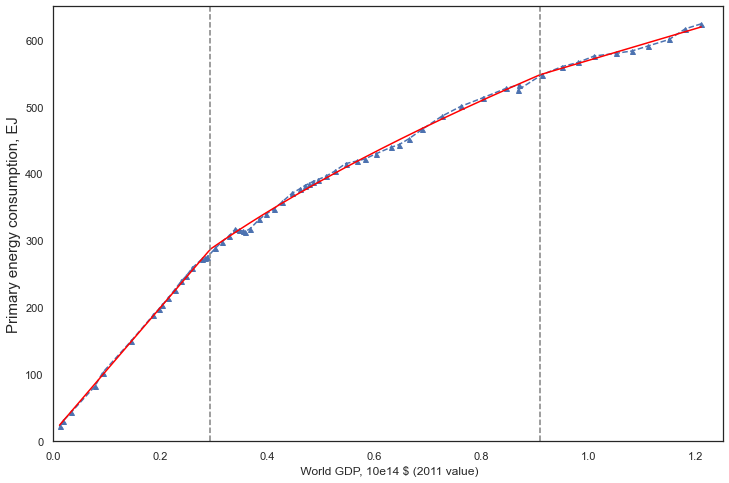

In [23]:
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
xplot=np.linspace(gdp.min(), gdp.max(), 200)
sns.set_theme(style='white')
plt.figure(figsize=(12,8))
a,y0,r,m, x1, x2 = reg.linPowLin(gdp, energy, p0= (9.289362129335744,  5.682514161047432,0.5445642627963901 , 0.1,0.30726966390378224, 1.1))
plt.plot(gdp, 100*energy, linestyle='dashed', marker='^', markersize=5)
dist1 = np.array([abs(gdp[i]-x1) for i in range(len(gdp))])
dist2 = np.array([abs(gdp[i]-x2) for i in range(len(gdp))])

plt.plot(xplot, 100*reg.lin_pow_lin(xplot,a,y0,r,m, x1, x2 ), color='red' )
plt.plot([x1]*15, np.linspace(0,650,15), label = str(year[dist1.argmin()]), linestyle='dashed', color='grey')
plt.plot([x2]*15, np.linspace(0,650,15), label = str(year[dist2.argmin()]),linestyle='dashed', color='grey' )

ypred = reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )
loss = reg.l2_loss(energy, ypred)
plt.ylabel("Primary energy consumption, EJ", fontsize=15)
plt.xlabel(" World GDP, 10e14 $ (2011 value)")
plt.xlim(0,1.25)
plt.ylim(0,650)
ypred= reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )*(10**5)
WRLD_table['Energy(PJ)-GDP(10e14$)'] = ypred

In [24]:
pop = int['Population']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
year=int['Year']

<ipython-input-25-44c19d85a77d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['GDPC(k$)-Time(year)'] = ypred


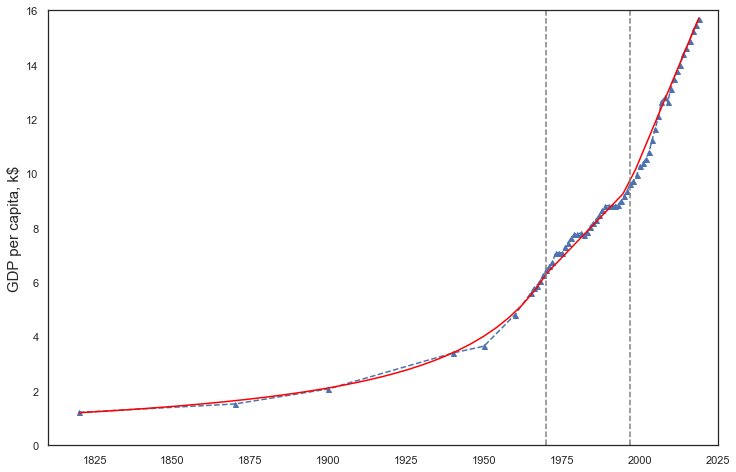

In [25]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3

timeplot = np.linspace(time.min(), time.max(), 50)
plt.figure(figsize=(12,8))
plt.plot(time, gdp/pop ,  linestyle='dashed', marker='^', markersize=5)
plt.plot(timeplot, (10**2)*reg.hyp_lin_lin(timeplot, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0027414715784530846,
 1970.2090080602459,
 1996), color='red')
ypred=reg.hyp_lin_lin(time, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0028414715784530846,
 1970.2090080602459,
 1997)
loss = reg.l2_loss(gdp/pop, ypred)
plt.plot([1970,1970], [0.00, 16], label='1970', linestyle='dashed', color='grey')
plt.plot([1997,1997], [0.00, 16], label='1997', linestyle='dashed', color='grey')
plt.ylabel('GDP per capita, k$', fontsize=15)

plt.xlim(1810, 2025)
plt.ylim(0,16)
ypred= (10**2)*ypred
WRLD_table['GDPC(k$)-Time(year)'] = ypred

(0.0, 16.0)

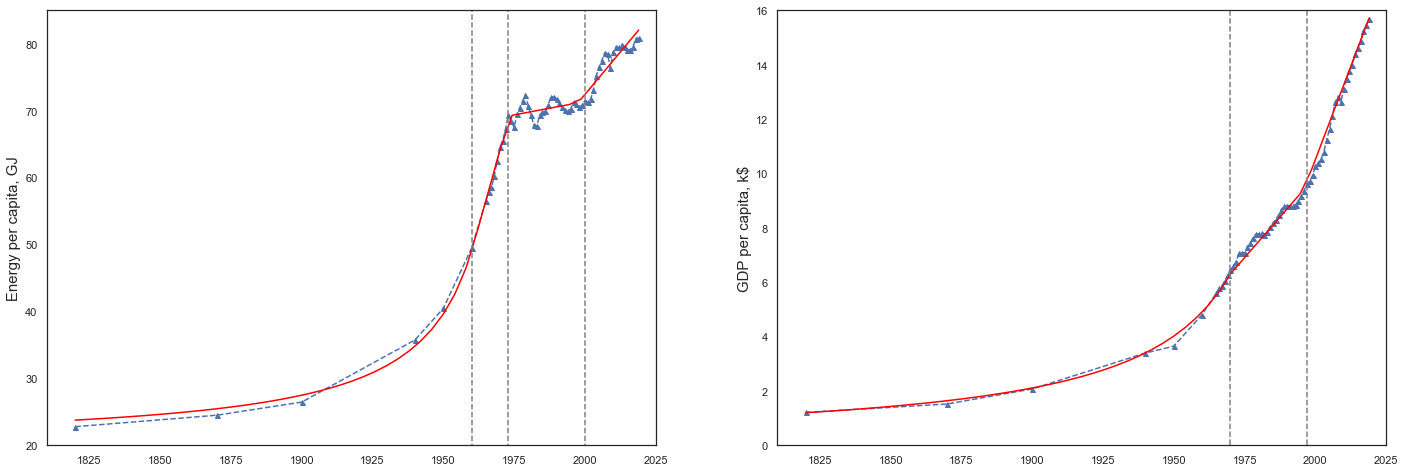

In [26]:
year=int['Year']

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3
energy_capita= energy/pop*(10**11)-20 #GJ
timeplot = np.linspace(time.min(), time.max(), 50)
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.plot(time, energy_capita+20,  linestyle='dashed', marker='^', markersize=5)
b,c,d,f,h,k,x1,x2, x3, x4 = 74,1986,0.015,0.01,0.010,0.02,1970, 2000, 2005, 5000

b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, energy_capita, p0=(b,c,d,f,h,k,x1,x2, x3, x4), maxfev=10000000000, bounds=[0,5000])
plt.plot(timeplot, reg.hypllll(timeplot, b,c,d,f,h,k,x1,x2, x3, x4)+20, color='red')
plt.plot([1960,1960], [0.00, 85], label='1970', linestyle='dashed', color='grey')
plt.plot([1973,1973], [0.00, 85], label='1997', linestyle='dashed', color='grey')
plt.plot([2000,2000], [0.00, 85], label='1997', linestyle='dashed', color='grey')
plt.ylim(20,85)
plt.xlim(1810,2025)
plt.ylabel("Energy per capita, GJ", fontsize=15)
plt.subplot(122)
plt.plot(time, gdp/pop ,  linestyle='dashed', marker='^', markersize=5)
plt.plot(timeplot, (10**2)*reg.hyp_lin_lin(timeplot, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0027414715784530846,
 1970.2090080602459,
 1996), color='red')
ypred=reg.hyp_lin_lin(time, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0028414715784530846,
 1970.2090080602459,
 1997)
loss = reg.l2_loss(gdp/pop, ypred)
plt.plot([1970,1970], [0.00, 16], label='1970', linestyle='dashed', color='grey')
plt.plot([1997,1997], [0.00, 16], label='1997', linestyle='dashed', color='grey')
plt.ylabel('GDP per capita, k$', fontsize=15)

plt.xlim(1810, 2025)
plt.ylim(0,16)

No handles with labels found to put in legend.
<ipython-input-27-ed6eeafbc899>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['GDP(2011$)-Time(year)'] =ypred


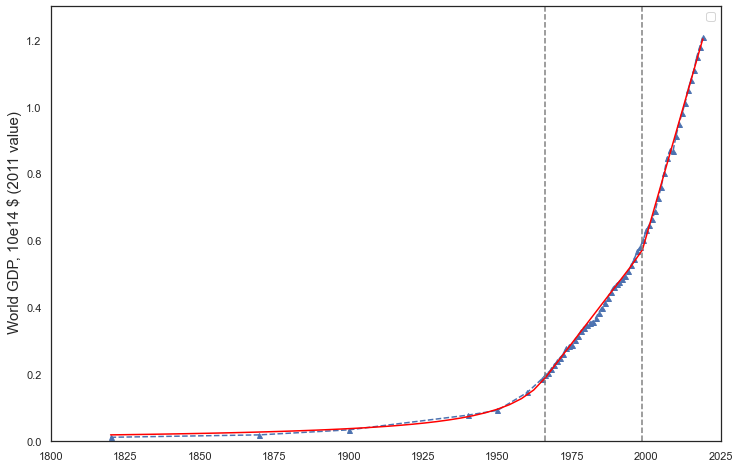

In [27]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**5
plt.figure(figsize=(12,8))
plt.plot(time, gdp/10**9, linestyle='dashed', marker='^', markersize=5)

ypred= reg.hyp_lin_lin(time, 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000)
loss = reg.l2_loss(gdp/10**9, ypred)

plt.legend()

plt.ylabel(" World GDP, 10e14 $ (2011 value)", fontsize=15)

b,c,d,f,x1,x2 = reg.hypLinLin(time, gdp/10**9, p0 = ( 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000), bounds = [0,2010], maxfev= 5000)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,b,c,d,f,x1,x2), color='red' )
plt.plot([x1,x1], [0.00, 1.3], label='1966', linestyle='dashed', color='grey')
plt.plot([x2, x2], [0.00, 1.3], label='1998', linestyle='dashed', color='grey')
plt.xlim(1800, 2025)
plt.ylim(0, 1.3)
ypred = (10**14)*ypred
WRLD_table['GDP(2011$)-Time(year)'] =ypred

<ipython-input-28-e70c8d2c5822>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['Energy(PJ)-Time(Year)'] = ypred


(0.0, 1.3)

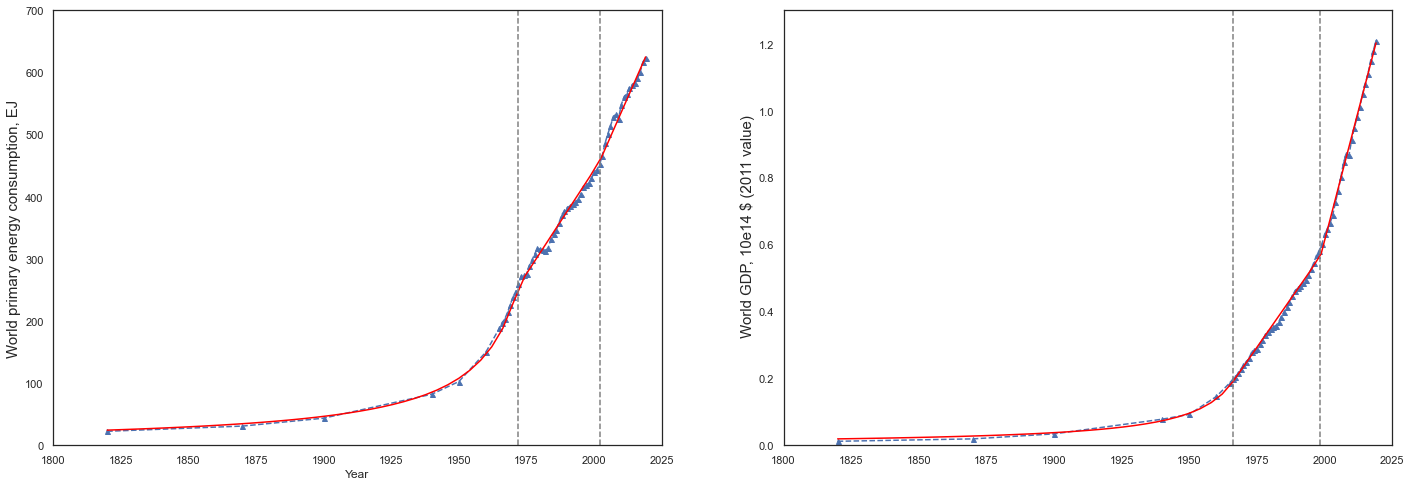

In [28]:
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.plot(time, energy*10**2, linestyle='dashed', marker='^', markersize=5)
x = np.linspace(1815, 1972)
plt.plot(timeplot, 100*reg.hyp_lin_lin(timeplot,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002), color='red')
plt.ylabel('Energy (exaJ)')
plt.xlabel('Year')
ypred = reg.hyp_lin_lin(time,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002)
loss = reg.l2_loss(ypred, energy)
plt.ylabel("World primary energy consumption, EJ", fontsize=15)
plt.plot([1972,1972], [0.00, 700], label='1972', linestyle='dashed', color='grey')
plt.plot([2002,2002], [0.00, 700], label='2002', linestyle='dashed', color='grey')
plt.ylim(0, 700)
plt.xlim(1800, 2025)


ypred = (10**3)*ypred
WRLD_table['Energy(PJ)-Time(Year)'] = ypred
plt.subplot(122)
plt.plot(time, gdp/10**9, linestyle='dashed', marker='^', markersize=5)

ypred= reg.hyp_lin_lin(time, 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000)
loss = reg.l2_loss(gdp/10**9, ypred)


plt.ylabel(" World GDP, 10e14 $ (2011 value)", fontsize=15)

b,c,d,f,x1,x2 = reg.hypLinLin(time, gdp/10**9, p0 = ( 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000), bounds = [0,2010], maxfev= 5000)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,b,c,d,f,x1,x2), color='red' )
plt.plot([x1,x1], [0.00, 1.3], label='1966', linestyle='dashed', color='grey')
plt.plot([x2, x2], [0.00, 1.3], label='1998', linestyle='dashed', color='grey')
plt.xlim(1800, 2025)
plt.ylim(0, 1.3)

<ipython-input-29-e701dacf2bd9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['EI(PJ/$)-Time(year)'] = ypred


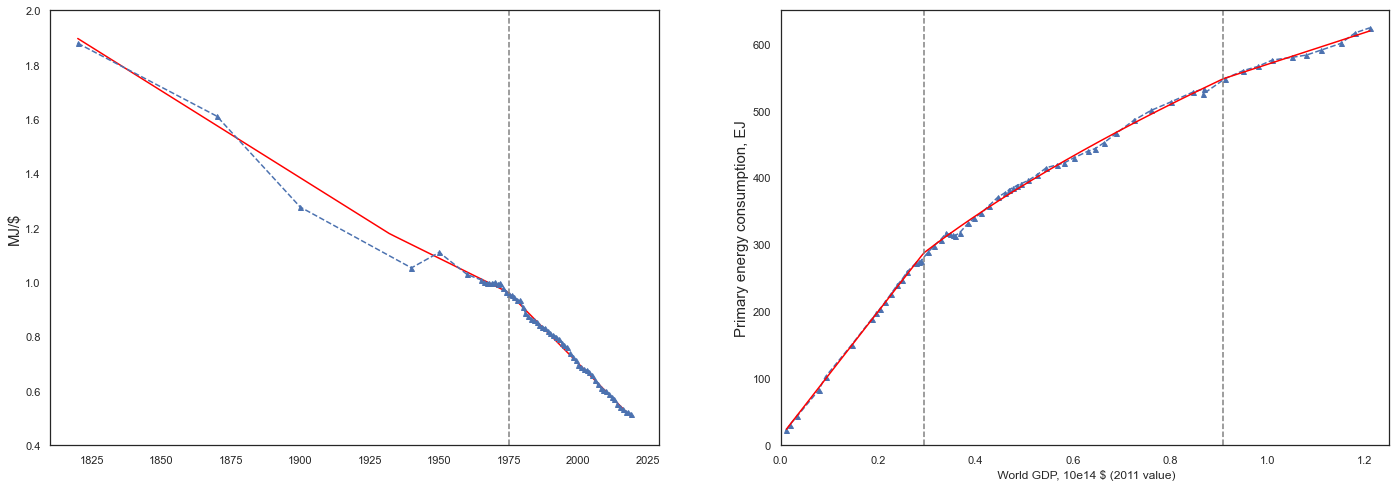

In [29]:
plt.figure(figsize=(24,8))
plt.subplot(121)
yplot = np.linspace(year.min(), year.max(), 200) 
a,b, c, e, g, x1, x2, x3 = -0.2, 5, -0.01, -0.2, -1, 1950, 1975, 2100
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2, 2200] )
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3), color='red')
plt.plot(year, energy/gdp*100*10**6, linestyle='dashed', marker='^', markersize=5)
plt.ylabel("MJ/$", fontsize=15)
ypred= reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-6)*(10**3)
WRLD_table['EI(PJ/$)-Time(year)'] = ypred
plt.plot([1975,1975],[0.4,2],linestyle='dashed', color='grey')
plt.ylim([0.4,2] )
plt.subplot(122)
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
a,y0,r,m, x1, x2 = reg.linPowLin(gdp, energy, p0= (9.289362129335744,  5.682514161047432,0.5445642627963901 , 0.1,0.30726966390378224, 1.1))
plt.plot(gdp, 100*energy, linestyle='dashed', marker='^', markersize=5)
dist1 = np.array([abs(gdp[i]-x1) for i in range(len(gdp))])
dist2 = np.array([abs(gdp[i]-x2) for i in range(len(gdp))])

plt.plot(xplot, 100*reg.lin_pow_lin(xplot,a,y0,r,m, x1, x2 ), color='red' )
plt.plot([x1]*15, np.linspace(0,650,15), label = str(year[dist1.argmin()]), linestyle='dashed', color='grey')
plt.plot([x2]*15, np.linspace(0,650,15), label = str(year[dist2.argmin()]),linestyle='dashed', color='grey' )

ypred = reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )
loss = reg.l2_loss(energy, ypred)
plt.ylabel("Primary energy consumption, EJ", fontsize=15)
plt.xlabel(" World GDP, 10e14 $ (2011 value)")
plt.xlim(0,1.25)
plt.ylim(0,650)
ypred= reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )*(10**5)

Text(0.5, 1.0, 'Variation in (%), World')

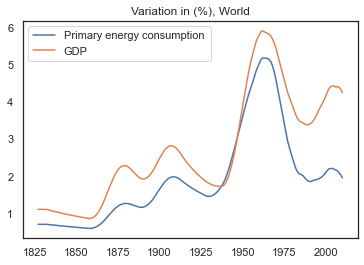

In [30]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), World")


In [31]:
WRLD_table = WRLD_table.rename(columns={'Total (TWh)':'Primary energy (TWh)', 'Population_x' : 'Population', 'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x' :  'GDP'})

In [32]:
WRLD_table

,Year,GDP,Population,Primary energy (TWh),Entity,Code,Energy(PJ)-GDP(10e14$),GDPC(k$)-Time(year),GDP(2011$)-Time(year),Energy(PJ)-Time(Year),EI(PJ/$)-Time(year)
0,1820,1.200000e+12,989818304,6264,World,OWID_WRL,24058.010862,1.198536,2.363032e+12,244.047619,0.001897
1,1870,1.920000e+12,1262682112,8592,World,OWID_WRL,30783.333838,1.641539,3.353622e+12,347.457627,0.001576
2,1900,3.420000e+12,1650000000,12128,World,OWID_WRL,44794.423371,2.109330,4.480587e+12,465.909091,0.001384
3,1940,7.810000e+12,2300000000,22840,World,OWID_WRL,85800.212071,3.401929,8.117868e+12,854.166667,0.001139
4,1950,9.250000e+12,2536431104,28516,World,OWID_WRL,99250.858023,4.017395,1.018485e+13,1078.947368,0.001088
...,...,...,...,...,...,...,...,...,...,...,...
56,2015,1.080000e+14,7379796992,162024,World,OWID_WRL,588472.503250,14.649630,1.062658e+14,5854.841289,0.000546
57,2016,1.110000e+14,7464022016,164081,World,OWID_WRL,595592.640869,14.933777,1.094805e+14,5953.959742,0.000535
58,2017,1.150000e+14,7547858944,166824,World,OWID_WRL,605086.157693,15.217924,1.126953e+14,6053.078195,0.000525
59,2018,1.180000e+14,7631091200,171240,World,OWID_WRL,612206.295312,15.502071,1.159100e+14,6152.196648,0.000515


In [33]:
WRLD_table.to_csv('../BDD/OWID_WRL.csv', index=False)